In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv


df=pd.read_csv('startup_funding.csv', encoding='utf-8')

['Sequoia Capital' 'Accel Partners' 'Kalaari Capital' 'Blume Ventures'
 'SAIF Partners']


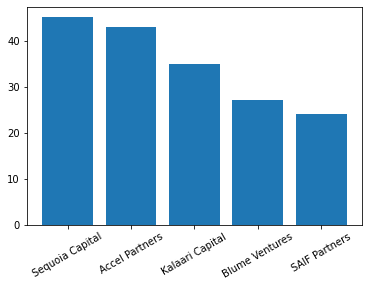

In [2]:
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'], inplace = True)

df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)

df = df[(df.InvestmentType == 'Private Equity')]

investors = list(df.InvestorsName)
startups = list(df.StartupName)

d = {}

for i in range(len(investors)):
    invest = investors[i].split(',')
    for inv in invest:
        inv = inv.strip()
        if (inv != '') and (inv != 'Undisclosed Investors'):
            if inv in d:
                s_ups = d[inv]
                s_ups.add(startups[i])
                d[inv] = s_ups
            else:
                d[inv] = {startups[i]}


for i in d:
    d[i] = len(d[i])
    
values = np.array(list(d.values()))
Investors_ = np.array(list(d.keys()))
ind = values.argsort()[::-1]
ind = ind[:5]

Five_Inv = Investors_[ind]
count = values[ind]

print(Five_Inv)

plt.bar(Five_Inv,count)
plt.xticks(rotation = 30)
plt.show()